<a href="https://colab.research.google.com/github/Marcosias0400/Optimizacion/blob/main/Funciones_optimizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones a Optimizar

Se van a optimizar las siguientes funciones; seguiran la siguiente estructura:

*Grafica

*Punto mínimo y valor del mínimo

Funciones a Optimizar:

->f1(x)= -x^6/60-x^5/50+x^4/2+2x^3/3-3.2x^2-6.4x

->f2(x)=-(x^6+x^5-10x^2-10x-12)/(x^2+6)

->f3(x)=5-(x4+2x3-3x2+13)^(1/2)

->f4(x)= sin^2(3x+45)+0.9sin^33 (9x)-sin (15x+50)cos (2x-30)

->f5(x)=sin(2πx)/x-cos(3πx)/x

->f6(x)= (2x-1)/x^2

->f7(x)= x^4 (log |x| - 1)

->f8(x)=e^(-x)(log |x|+x/|x|)

In [2]:
%matplotlib inline
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [3]:
# Definicion de las funciones de prueba
def f1(x):
  return -x**6/60-x**5/50+x**4/2+2*x**3/3-3.2*x**2-6.4*x
def f2(x):
  return -(x**6+x**5-10*x**2-10*x-12)/(x**2+6)
def f3(x):
  return 5-m.sqrt(x**4+2*x**3-3*x**2+13)
def f4(x):
  return (m.sin(3*x+45))**2+0.9*(m.sin(9*x))**3-m.sin(15*x+50)*m.cos(2*x-30)
def f5(x):
  return m.sin(2*m.pi*x)/x-m.cos(3*m.pi*x)/x
def f6(x):
  return (2*x-1)/x**2
def f7(x):
  return  (m.log(abs(x))-1)*x**4
def f8(x):
  return m.exp(-x)(m.log(abs(x))+x/abs(x))

In [5]:
# Funciones de graficacion
def plotPuntos(a,b,f):
  # linea de puntos de la funcion f
  #   a es el limite inferior
  #   b es el limite inferior
  X=np.linspace(a,b,100)
  F=f(X)
  # Retornan los valores de la funcion y una linea de R con 100 particion
  return X,F
def GraficarFuncionObjetivo(a,b,f):
  # Lineas de puntos de x y f(x)
  X,F=plotPuntos(a,b,f)
  # Crea el objeto grafica, color azul
  plt.plot(X,F,'b')
  # Nombre del eje x
  plt.xlabel('x')
  # Nombre del eje y
  plt.ylabel('f(x)')
  # Grafica una malla
  plt.grid()
  # Muestra la grafica
  plt.show()

In [7]:
# Primera derivada en un punto
def d1f(f,x):
  # Definida con diferenciacion numerica
  h=1e-6
  return (f(x+h)-f(x-h))/(2*h)
def d2f(f,x):
  # Definida con diferenciacion numerica
  h=1e-6
  return (f(x+h)-2*f(x)+f(x-h))/h**2

In [10]:
# definicion de las rutinas de optimizacion
# Metodo de la biseccion
def biseccion(a,b,f):
  # Tolerancia del metodo
  tol=0.001
  paso=True
  # contador de las iteraciones
  cont=0
  # registro de las iteraciones
  registro=[]
  while(paso):
    # bisecta el dominio de busqueda
    c=(a+b)/2
    # Primera derivada en a
    df_a=d1f(a)
    # Primera derivada en c
    df_c=d1f(c)
    if df_a*df_c<0:
      b=c
    else:
      a=c
    # Condicion de finalizacion
    if abs(b-a)<tol:
      paso=False
    cont+=1
    registro.append([cont,a,f(a)])
  return registro

In [ ]:
# Metodo de newton Rapson
def newtonRaphson(a,b,f):
  # Punto inicial
  x=b
  # Tolerancia del metodo
  tol=0.001
  # contador de iteraciones
  cont=0
  # Registro de convergencia del metodo
  registro=[]
  # Bandera de ruptura
  paso=True
  while paso:
    # Calculo de derivadas en un punto x_i
    d1f_x=d1f(x,f)
    d2f_x=d2f(x,f)
    xn=x
    x=xn-d1f_x/d2f_x
    f_x=f(x)
    cont+=1
    registro.append([cont,x,f_x])
    # si la tolerancia es menor se ropr
    if abs(x-xn)<tol:
      paso=False
  return registro

In [ ]:
# Metodo de la secante
def secante(a,b,f):
  # Tolerancia del metodo
  tol=0.001
  # contador de iteraciones
  cont=0
  # registro de la convergancia del metodo
  registro=[]
  paso=True
  while paso:
    # Calcular la primera derivada en a
    df_a=d1f(a,f)
    df_b=d1f(b,f)
    # Calculo de c
    c=b-df_b*(b-a)/(df_b-df_a)
    if d1f(c,f)>0:
      b=c
    else:
      a=c
    cont+=1
    registro.append([cont,c,U(c)])
    if abs(d1f(c,f))<tol:
      paso=False
  return registro


In [ ]:
# metod de la seccion dorada
def seccion_dorada(a,b,f):
  #2 menos el numero phi (proporcion aurea)
  t=2-1.618033988
  #tolerancia
  tol=1e-6
  # Nuevos limites
  a1=a*(1-t)+b*t
  b1=a*t+b*(1-t)
  # Registro
  reg=[]
  cont=0
  paso=True
  while paso:
    if f(a1)>f(b1):
      a=a1
    else:
      b=b1
    cont+=1
    reg.append([cont,b1,f(b1)])
    if abs(a-b)<tol:
      paso=False
    else:
      a1=a*(1-t)+b*t
      b1=a*t+b*(1-t)
  return reg

In [ ]:
# Necesario para el metodo de Fibonacci
def fibonacci_s(n):
  fib=[1,1]
  for i in range(n):
    fib.append(fib[i-1]+fib[i-2])
  return fib
# Metodo de Fibonacci
def opt_fib(a,b,f,n):
  tol=1e-6
  # n del metodo, que es fijo
  fs=fibonacci_s(n)
  # Se inicializa k con 2
  k=2
  # Se requiere la longitud total del intevalo
  L=b-a
  # El algoritmmo recorre toda la sucesion de fibonacci desde el
  # ultimo termino, si el algorimto no converge con la cantidad de
  # trerminos de la sucacion de fibonacci, hay que tener cuidado
  Lk=fs[n-k+1]*L/fs[-1]
  x_a=a+Lk
  x_b=b-Lk
  cont=0
  paso=True
  reg=[]
  while paso:

    if f(x_a)>f(x_b):
      a=x_a
    else:
      b=x_b
    k+=1
    cont+=1
    reg.append([cont,x_a,f(x_a)])
    if abs(a-b)<tol:
      paso=False
    else:
      # Por si el metodo se acaba la sucesion de fibonacci
      if k==len(fs):
        paso=False
      else:
        # Redefine x_a,x_b y regresa el ciclo
        Lk=fs[n-k+1]*L/fs[-1]
        x_a=a+Lk
        x_b=b-Lk
  return reg

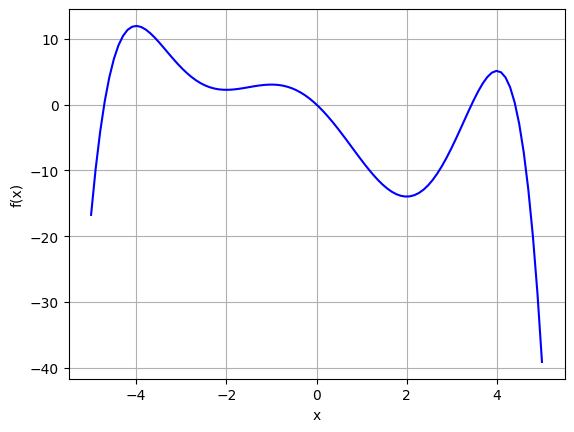

In [8]:
#Graficacion de la primarea funcion f1
# x=[a,b]
x1=[-5,5]
GraficarFuncionObjetivo(x1[0],x1[1],f1)